<a href="https://colab.research.google.com/github/larin92/ML_zoomcamp/blob/main/03-classification/03-homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline

### Data preparation

In this homework, we will use the Car price [dataset](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

We'll work with the `MSRP` (manufacturer suggested retail price) variable, and we'll transform it to a classification task.

`MSRP` is targer var, we will store targets in `price` var later though, and use binary representation of `price` being above or below mean in `above_average` var

In [2]:
# !command style for colab use
# !wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

df_raw = pd.read_csv('car_pricing.csv')
price = None

In [3]:
print(df_raw.head())
print("\nshape: ", df_raw.shape)

  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

In [4]:
selected_columns = ['MSRP', 'Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 
                    'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg']
df_filtered = df_raw[selected_columns]
df_filtered.columns = df_filtered.columns.str.replace(' ', '_').str.lower()
df_filtered.fillna(0, inplace=True)
df_filtered.rename(columns={'msrp': 'price'}, inplace=True)
price = df_filtered.pop('price')
df_filtered.head()

C:\Users\larki\AppData\Local\Temp\ipykernel_19088\2779128555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(0, inplace=True)
C:\Users\larki\AppData\Local\Temp\ipykernel_19088\2779128555.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={'msrp': 'price'}, inplace=True)


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18


### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

In [5]:
df_filtered.transmission_type.mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

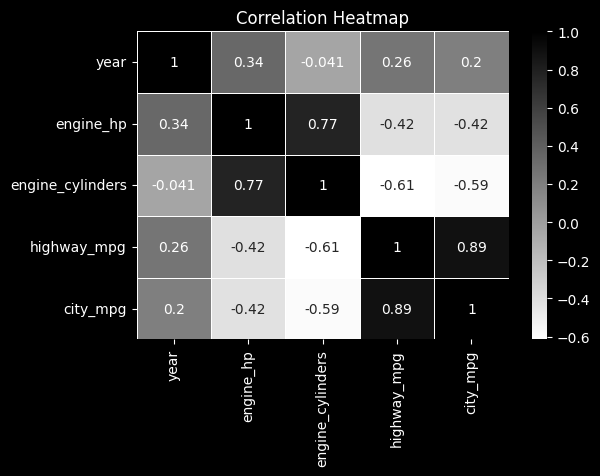

In [6]:
corr = df_filtered[['year', 
                    'engine_hp', 
                    'engine_cylinders', 
                    'highway_mpg', 
                    'city_mpg']].corr()

plt.style.use("dark_background")
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap=cm.binary, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

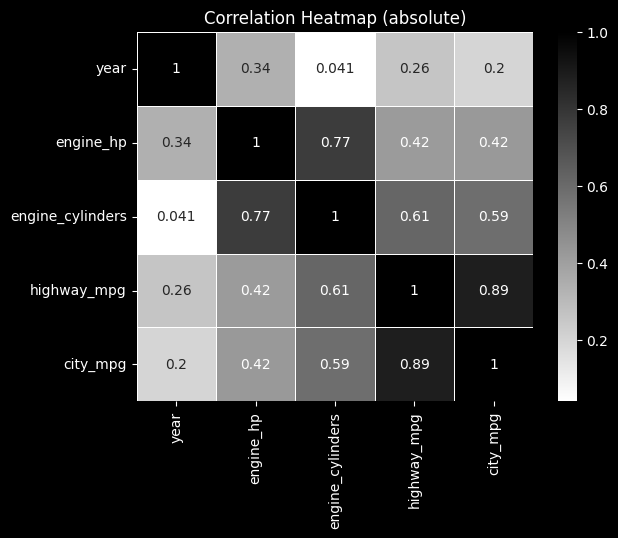

In [7]:
sns.heatmap(corr.abs(), annot=True, cmap=cm.binary, linewidths=.5)
plt.title('Correlation Heatmap (absolute)')
plt.show()

### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`price`) is not in your dataframe.

In [8]:
from dataclasses import dataclass
from sklearn.model_selection import train_test_split

@dataclass
class Split:
    X_train: pd.DataFrame
    X_val: pd.DataFrame
    X_test: pd.DataFrame
    y_train: pd.DataFrame
    y_val: pd.DataFrame
    y_test: pd.DataFrame

def train_val_test_split(df: pd.DataFrame, target, frac=[0.6, 0.2, 0.2], seed=42):
    train_size = frac[0]
    test_size = frac[2]
    relative_val_size = frac[1] / (train_size + test_size)
    
    # sklearn's split is not convenient, pandas sample() is more convenient
    X_train, X_test, y_train, y_test \
        = train_test_split(df, target, test_size=test_size, random_state=42)
    
    X_train, X_val, y_train, y_val \
        = train_test_split(X_train, y_train, test_size=relative_val_size, random_state=42)
    
    X_train.reset_index(drop=True, inplace=True)
    X_val.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)

    return Split(X_train, X_val, X_test, y_train, y_val, y_test)

above_average = (price > price.mean()).astype('int')
above_average.name = 'above_average'
split = train_val_test_split(df_filtered, above_average)

### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?

In [9]:
from sklearn.metrics import mutual_info_score

mi_scores = split.X_train.select_dtypes(include=['object']) \
                         .apply(lambda x: mutual_info_score(x, split.y_train))
np.round(mi_scores, 2)

make                 0.24
model                0.46
transmission_type    0.02
vehicle_style        0.08
dtype: float64

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

In [10]:
import sklearn.linear_model as sklin
from sklearn.metrics import accuracy_score

def fit_and_eval(df: pd.DataFrame):
    split_temp = train_val_test_split(df, above_average)
    model = sklin.LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(split_temp.X_train, split_temp.y_train)
    y_val_pred = model.predict(split_temp.X_val)
    
    return accuracy_score(split_temp.y_val, y_val_pred)

df_filtered_ohe = pd.get_dummies(df_filtered, dtype=int)
fit_and_eval(df_filtered_ohe)

0.9345362987830466

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest absolute difference?
- year
- engine_hp
- transmission_type
- city_mpg

In [11]:
feature_elim_list = ['year', 'engine_hp', 'transmission_type', 'city_mpg']

original_score = fit_and_eval(df_filtered_ohe)
diffs = {}
for feature in feature_elim_list:
    df_temp = pd.get_dummies(df_filtered.drop(columns=feature), dtype=int)
    diffs[feature] = abs(original_score - fit_and_eval(df_temp))
diffs

{'year': 0.013008812421317684,
 'engine_hp': 0.034830046160302164,
 'transmission_type': 0.010490977759127218,
 'city_mpg': 0.01091061686949224}

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?
> **Note**: If there are multiple options, select the smallest `alpha`.

In [13]:
df_q6 = pd.get_dummies(df_filtered.drop(columns='model'), dtype=int)  # perf measure
split_q6 = train_val_test_split(df_q6, np.log1p(price))
split_q6.y_train = np.log1p(split_q6.y_train)
split_q6.y_val = np.log1p(split_q6.y_val)

scores = {}
rmse = lambda true, pred: np.sqrt(((true - pred)**2).mean())
for alpha in [0, 0.01, 0.1, 1, 10]: 
    model = sklin.Ridge(solver="sag", alpha=alpha, random_state=42)
    model.fit(split_q6.X_train, split_q6.y_train)
    y_val_pred = model.predict(split_q6.X_val)
    scores[str(alpha)] = rmse(split_q6.y_val, y_val_pred)

scores

c:\Users\larki\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\larki\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\larki\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\larki\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\larki\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_

{'0': 0.04797393686124569,
 '0.01': 0.04797395205478243,
 '0.1': 0.04797408879284658,
 '1': 0.047975455867824965,
 '10': 0.04798909583684073}